In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats.stats import pearsonr
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Lets read temperature file to create the DF
file_temp = "weather_data/temperature.csv"
temp_df = pd.read_csv(file_temp, encoding="ISO-8859-1")
temp_df_city = temp_df[['datetime','Los Angeles','Chicago','Vancouver','Philadelphia','New York']]
temp_df_city_2015 = temp_df_city[temp_df_city['datetime'].str.contains('2015')]

#Remove the NAN. Since we have lot of data we can just drop any values
temp_df_city_2015 = temp_df_city_2015.dropna(how="any")
temp_df_city_2015.head()

,datetime,Los Angeles,Chicago,Vancouver,Philadelphia,New York
19716,2015-01-01 00:00:00,276.988500,266.138500,274.700,268.851000,268.050
19717,2015-01-01 01:00:00,277.518333,266.418333,274.586,267.801667,268.050
19718,2015-01-01 02:00:00,276.311667,266.936667,274.586,267.278333,267.186
19719,2015-01-01 03:00:00,274.348000,266.535500,274.586,267.485500,267.186
19720,2015-01-01 04:00:00,273.393667,267.360333,274.586,266.718667,267.186


In [3]:
temp_df_city_2015[['Year','Month','Ext']] = temp_df_city_2015['datetime'].str.split('-', expand=True)
temp_df_city_2015[['Day','Time']] = temp_df_city_2015['Ext'].str.split(' ', expand=True)
temp_df_city_2015 = temp_df_city_2015.drop(['Ext'], axis=1)
temp_df_city_2015.head()

,datetime,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Year,Month,Day,Time
19716,2015-01-01 00:00:00,276.988500,266.138500,274.700,268.851000,268.050,2015,01,01,00:00:00
19717,2015-01-01 01:00:00,277.518333,266.418333,274.586,267.801667,268.050,2015,01,01,01:00:00
19718,2015-01-01 02:00:00,276.311667,266.936667,274.586,267.278333,267.186,2015,01,01,02:00:00
19719,2015-01-01 03:00:00,274.348000,266.535500,274.586,267.485500,267.186,2015,01,01,03:00:00
19720,2015-01-01 04:00:00,273.393667,267.360333,274.586,266.718667,267.186,2015,01,01,04:00:00


In [4]:
temp_df_city_2015_month = temp_df_city_2015.groupby(['Month'])
temp_df_city_2015_month_avg = temp_df_city_2015_month.mean()
temp_df_city_2015_month_avg

,Los Angeles,Chicago,Vancouver,Philadelphia,New York
Month,,,,,
01,282.676923,267.862021,279.106892,269.890318,268.970405
02,284.738212,262.712147,280.713602,266.595234,265.911847
03,287.614923,272.986255,280.855311,274.415456,274.168749
04,286.678284,280.327832,281.151683,284.937450,283.328344
05,287.691922,285.515641,287.257669,293.040608,291.882398
06,294.145320,289.400139,291.002764,295.178558,293.496943
07,296.044807,295.252852,293.402823,297.013756,297.396855
08,297.991759,294.711922,292.117849,296.320938,297.193199
09,297.731173,293.296431,287.135419,294.188409,294.737729


In [5]:
# temp_df_city_2015_date = temp_df_city_2015.groupby(['Month','Day'])
# temp_df_city_2015_date.mean()

In [6]:
#Lets read crime rate for Los Angeles
crime_file = "crime-Los Angeles/crime_data_2010_2017.csv"
crime_LA = pd.read_csv(crime_file, encoding="us-ascii")
crime_LA_2015 = crime_LA[crime_LA['Date Occurred'].str.contains('2015')]
crime_LA_2015

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
200609,809,01/17/2015,01/16/2015,2130,9,Van Nuys,938,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,6200 FULTON AV,NaN,"(34.1814, -118.4263)"
200648,150108522,03/11/2015,03/11/2015,1600,1,Central,143,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325,...,NaN,IC,Invest Cont,442.0,NaN,NaN,NaN,5TH,BROADWAY,"(34.0481, -118.2507)"
201228,150109432,03/24/2015,03/23/2015,1800,1,Central,185,310,BURGLARY,0344 1602,...,NaN,IC,Invest Cont,310.0,998.0,NaN,NaN,1200 MAPLE AV,NaN,"(34.0388, -118.2574)"
201249,150109804,03/29/2015,03/29/2015,800,1,Central,111,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,800 N HILL ST,NaN,"(34.0628, -118.2395)"
201589,150114304,06/08/2015,06/08/2015,1015,1,Central,144,850,INDECENT EXPOSURE,0529,...,NaN,IC,Invest Cont,850.0,NaN,NaN,NaN,400 S SPRING ST,NaN,"(34.0488, -118.2483)"
201713,150115324,06/24/2015,06/23/2015,2230,1,Central,135,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 S MAIN ST,NaN,"(34.051, -118.2445)"
201733,150116252,07/08/2015,07/06/2015,545,1,Central,127,946,OTHER MISCELLANEOUS CRIME,0443,...,VERBAL THREAT,IC,Invest Cont,946.0,NaN,NaN,NaN,JUDGE JOHN AISO,TEMPLE,"(34.0525, -118.2409)"
202598,150116299,07/08/2015,07/08/2015,2355,1,Central,153,888,TRESPASSING,1501,...,NaN,IC,Invest Cont,888.0,NaN,NaN,NaN,500 S SPRING ST,NaN,"(34.0467, -118.252)"
202856,150116489,07/11/2015,07/10/2015,2100,1,Central,192,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,1300 MARGO ST,NaN,"(34.0386, -118.2638)"
205072,150116490,07/11/2015,07/10/2015,2100,1,Central,162,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,700 S HILL ST,NaN,"(34.0462, -118.2585)"


In [7]:
crime_LA_2015[['Month','Day','Year']] = crime_LA_2015['Date Occurred'].str.split('/', expand=True)
crime_LA_2015.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Month,Day,Year
200609,809,01/17/2015,01/16/2015,2130,9,Van Nuys,938,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,6200 FULTON AV,NaN,"(34.1814, -118.4263)",01,16,2015
200648,150108522,03/11/2015,03/11/2015,1600,1,Central,143,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325,...,442.0,NaN,NaN,NaN,5TH,BROADWAY,"(34.0481, -118.2507)",03,11,2015
201228,150109432,03/24/2015,03/23/2015,1800,1,Central,185,310,BURGLARY,0344 1602,...,310.0,998.0,NaN,NaN,1200 MAPLE AV,NaN,"(34.0388, -118.2574)",03,23,2015
201249,150109804,03/29/2015,03/29/2015,800,1,Central,111,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,800 N HILL ST,NaN,"(34.0628, -118.2395)",03,29,2015
201589,150114304,06/08/2015,06/08/2015,1015,1,Central,144,850,INDECENT EXPOSURE,0529,...,850.0,NaN,NaN,NaN,400 S SPRING ST,NaN,"(34.0488, -118.2483)",06,08,2015


In [8]:
crime_LA_2015_month = crime_LA_2015.groupby('Month')
crime_LA_2015_month_count_df = crime_LA_2015_month.count()
crime_LA_2015_month_count_df

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Day,Year
Month,,,,,,,,,,,,,,,,,,,,,
01,17981,17981,17981,17981,17981,17981,17981,17981,17977,16073,...,17981,17981,1144,33,2,17981,2847,17981,17981,17981
02,15930,15930,15930,15930,15930,15930,15930,15930,15928,14287,...,15930,15930,1035,37,2,15930,2586,15930,15930,15930
03,17907,17907,17907,17907,17907,17907,17907,17907,17900,16149,...,17907,17907,1264,38,2,17907,2895,17907,17907,17907
04,16869,16869,16869,16869,16869,16869,16869,16869,16868,15275,...,16869,16869,1138,45,3,16869,2727,16869,16869,16869
05,17839,17839,17839,17839,17839,17839,17839,17839,17837,16083,...,17839,17839,1237,30,0,17839,2904,17839,17839,17839
06,17423,17423,17423,17423,17423,17423,17423,17423,17423,15767,...,17423,17423,1203,33,0,17423,2910,17423,17423,17423
07,18553,18553,18553,18553,18553,18553,18553,18553,18550,16679,...,18553,18553,1257,29,0,18553,3060,18553,18553,18553
08,18877,18877,18877,18877,18877,18877,18877,18877,18873,16873,...,18877,18876,1259,31,1,18877,3164,18877,18877,18877
09,18152,18152,18152,18152,18152,18152,18152,18152,18151,16275,...,18152,18152,1233,31,0,18152,3078,18152,18152,18152


In [9]:
temp_df_city_2015_month_avg['Crime Los Angeles'] = crime_LA_2015_month_count_df['Date Occurred']
temp_df_city_2015_month_avg

,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Crime Los Angeles
Month,,,,,,
01,282.676923,267.862021,279.106892,269.890318,268.970405,17981
02,284.738212,262.712147,280.713602,266.595234,265.911847,15930
03,287.614923,272.986255,280.855311,274.415456,274.168749,17907
04,286.678284,280.327832,281.151683,284.937450,283.328344,16869
05,287.691922,285.515641,287.257669,293.040608,291.882398,17839
06,294.145320,289.400139,291.002764,295.178558,293.496943,17423
07,296.044807,295.252852,293.402823,297.013756,297.396855,18553
08,297.991759,294.711922,292.117849,296.320938,297.193199,18877
09,297.731173,293.296431,287.135419,294.188409,294.737729,18152


In [10]:
#Lets read crime rate for Chicago
crime_chicago = "crime-Los Angeles/Chicago_Crimes_2012_to_2017.csv"
crime_CHI = pd.read_csv(crime_chicago, encoding="us-ascii")

crime_CHI_2015 = crime_CHI[crime_CHI['Date'].str.contains('2015')]
crime_CHI_2015

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
154,36509,10514462,HZ256372,01/01/2015 12:00:00 AM,073XX S EXCHANGE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,NURSING HOME/RETIREMENT HOME,False,...,7.0,43.0,02,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN
157,37451,10515175,HZ257172,11/24/2015 05:30:00 PM,033XX W ADAMS ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,27.0,06,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN
190,46637,10077106,HY266148,05/19/2015 01:12:00 AM,009XX W BELMONT AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,...,44.0,6.0,08A,1169640.0,1921442.0,2015,05/11/2016 03:48:18 PM,41.939943,-87.651925,"(41.939943264, -87.651924995)"
191,46745,10301916,HY469211,01/01/2015 12:00:00 AM,062XX W BARRY AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,36.0,19.0,02,1134262.0,1919947.0,2015,05/11/2016 03:48:18 PM,41.936539,-87.781987,"(41.936538876, -87.781987083)"
744,207345,10160687,HY313819,06/24/2015 06:00:00 AM,052XX N MARMORA AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,...,45.0,11.0,18,1135867.0,1934466.0,2015,05/12/2016 03:48:29 PM,41.976352,-87.775741,"(41.976351974, -87.775741229)"
745,207432,10181647,HY215976,04/09/2015 04:30:51 PM,061XX S CHAMPLAIN AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),RESIDENCE,True,...,20.0,42.0,18,1181623.0,1864501.0,2015,05/12/2016 03:48:29 PM,41.783424,-87.609648,"(41.783424215, -87.609648327)"
746,207605,10192026,HY360910,07/29/2015 04:21:21 PM,029XX W FLOURNOY ST,2027,NARCOTICS,POSS: CRACK,APARTMENT,True,...,2.0,27.0,18,1156974.0,1896894.0,2015,05/12/2016 03:48:29 PM,41.872848,-87.699144,"(41.872848316, -87.69914356)"
747,207671,10203133,HY381916,08/14/2015 10:55:00 AM,054XX W WALTON ST,1821,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,VEHICLE NON-COMMERCIAL,True,...,37.0,25.0,18,1139924.0,1905802.0,2015,05/12/2016 03:48:29 PM,41.897622,-87.761525,"(41.897621617, -87.761524853)"
748,207803,10211492,HY257237,05/12/2015 11:54:19 AM,066XX S WASHTENAW AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,...,15.0,66.0,18,1159517.0,1860604.0,2015,05/12/2016 03:48:29 PM,41.773212,-87.690803,"(41.773212262, -87.690803401)"
750,208172,10211589,HY340025,07/14/2015 06:00:00 AM,033XX W FILLMORE ST,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,POLICE FACILITY/VEH PARKING LOT,True,...,24.0,29.0,18,1154228.0,1895173.0,2015,05/12/2016 03:48:29 PM,41.868181,-87.709271,"(41.868180939, -87.709271389)"


In [11]:
crime_CHI_2015[['Month','Day','Ext']] = crime_CHI_2015['Date'].str.split('/', expand=True)
crime_CHI_2015[['Year','Time']] = crime_CHI_2015['Ext'].str.split(' ', 1, expand=True)
crime_CHI_2015 = crime_CHI_2015.drop(['Ext'], axis=1)

crime_CHI_2015.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Time
154,36509,10514462,HZ256372,01/01/2015 12:00:00 AM,073XX S EXCHANGE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,NURSING HOME/RETIREMENT HOME,False,...,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN,01,01,12:00:00 AM
157,37451,10515175,HZ257172,11/24/2015 05:30:00 PM,033XX W ADAMS ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN,11,24,05:30:00 PM
190,46637,10077106,HY266148,05/19/2015 01:12:00 AM,009XX W BELMONT AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,...,1169640.0,1921442.0,2015,05/11/2016 03:48:18 PM,41.939943,-87.651925,"(41.939943264, -87.651924995)",05,19,01:12:00 AM
191,46745,10301916,HY469211,01/01/2015 12:00:00 AM,062XX W BARRY AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,1134262.0,1919947.0,2015,05/11/2016 03:48:18 PM,41.936539,-87.781987,"(41.936538876, -87.781987083)",01,01,12:00:00 AM
744,207345,10160687,HY313819,06/24/2015 06:00:00 AM,052XX N MARMORA AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,...,1135867.0,1934466.0,2015,05/12/2016 03:48:29 PM,41.976352,-87.775741,"(41.976351974, -87.775741229)",06,24,06:00:00 AM


In [12]:
crime_CHI_2015_month = crime_CHI_2015.groupby('Month')
crime_CHI_2015_month_count_df = crime_CHI_2015_month.count()
crime_CHI_2015_month_count_df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Time
Month,,,,,,,,,,,,,,,,,,,,,
01,20656,20656,20656,20656,20656,20656,20656,20656,20639,20656,...,20656,20309,20309,20656,20656,20309,20309,20309,20656,20656
02,16287,16287,16287,16287,16287,16287,16287,16287,16267,16287,...,16287,16079,16079,16287,16287,16079,16079,16079,16287,16287
03,21560,21560,21560,21560,21560,21560,21560,21560,21530,21560,...,21560,21271,21271,21560,21560,21271,21271,21271,21560,21560
04,21610,21610,21610,21610,21610,21610,21610,21610,21594,21610,...,21610,21467,21467,21610,21610,21467,21467,21467,21610,21610
05,23570,23570,23570,23570,23570,23570,23570,23570,23560,23570,...,23570,23355,23355,23570,23570,23355,23355,23355,23570,23570
06,23059,23059,23059,23059,23059,23059,23059,23059,23044,23059,...,23059,22930,22930,23059,23059,22930,22930,22930,23059,23059
07,24101,24101,24101,24101,24101,24101,24101,24101,24086,24101,...,24101,23915,23915,24101,24101,23915,23915,23915,24101,24101
08,24685,24685,24685,24685,24685,24685,24685,24685,24667,24685,...,24685,24472,24472,24685,24685,24472,24472,24472,24685,24685
09,22996,22996,22996,22996,22996,22996,22996,22996,22979,22996,...,22996,22716,22716,22996,22996,22716,22716,22716,22996,22996


In [13]:
temp_df_city_2015_month_avg['Crime Chicago'] = crime_CHI_2015_month_count_df['Date']
temp_df_city_2015_month_avg

,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Crime Los Angeles,Crime Chicago
Month,,,,,,,
01,282.676923,267.862021,279.106892,269.890318,268.970405,17981,20656
02,284.738212,262.712147,280.713602,266.595234,265.911847,15930,16287
03,287.614923,272.986255,280.855311,274.415456,274.168749,17907,21560
04,286.678284,280.327832,281.151683,284.937450,283.328344,16869,21610
05,287.691922,285.515641,287.257669,293.040608,291.882398,17839,23570
06,294.145320,289.400139,291.002764,295.178558,293.496943,17423,23059
07,296.044807,295.252852,293.402823,297.013756,297.396855,18553,24101
08,297.991759,294.711922,292.117849,296.320938,297.193199,18877,24685
09,297.731173,293.296431,287.135419,294.188409,294.737729,18152,22996


In [14]:
#convert Kelvin to Farenheit 
# F = (K-273.15)*9/5+32
temp_df_city_2015_month_avg['Los Angeles'] = (temp_df_city_2015_month_avg['Los Angeles']-273.15)*9/5+32
temp_df_city_2015_month_avg['Chicago'] = (temp_df_city_2015_month_avg['Chicago']-273.15)*9/5+32
temp_df_city_2015_month_avg['Vancouver'] = (temp_df_city_2015_month_avg['Vancouver']-273.15)*9/5+32
temp_df_city_2015_month_avg['Philadelphia'] = (temp_df_city_2015_month_avg['Philadelphia']-273.15)*9/5+32
temp_df_city_2015_month_avg['New York'] = (temp_df_city_2015_month_avg['New York']-273.15)*9/5+32

temp_df_city_2015_month_avg

,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Crime Los Angeles,Crime Chicago
Month,,,,,,,
01,49.148462,22.481637,42.722406,26.132572,24.476729,17981,20656
02,52.858782,13.211865,45.614484,20.201421,18.971325,15930,16287
03,58.036861,31.705260,45.869559,34.277820,33.833749,17907,21560
04,56.350911,44.920098,46.403030,53.217411,50.321019,16869,21610
05,58.175460,54.258154,57.393804,67.803094,65.718317,17839,23570
06,69.791577,61.250251,64.134975,71.651405,68.624498,17423,23059
07,73.210653,71.785134,68.455081,74.954760,75.644339,18553,24101
08,76.715166,70.811460,66.142129,73.707688,75.277758,18877,24685
09,76.246112,68.263577,57.173755,69.869135,70.857912,18152,22996


Text(0, 0.5, 'Total crimes per month')

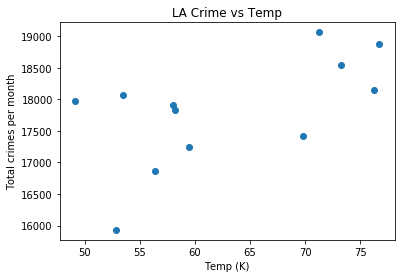

In [15]:
plt.scatter(temp_df_city_2015_month_avg['Los Angeles'], temp_df_city_2015_month_avg['Crime Los Angeles'])

plt.title("LA Crime vs Temp")
plt.xlabel("Temp (K)")
plt.ylabel("Total crimes per month")

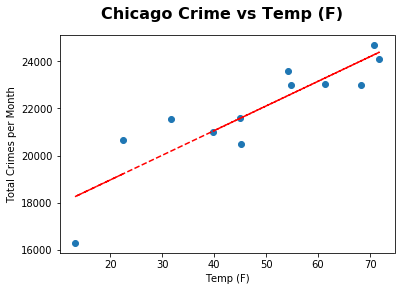

Equation of best-fit line:
Total Crimes per month = 16865.57495720687 + 104.79070304578026(Temperature)

R-value = 0.889
R-sq = 0.790321
79% of the variation of Total Crimes per month can be explained by Temp


In [21]:
# Set line
(slope, intercept, rvalue, _, _) = linregress(temp_df_city_2015_month_avg['Chicago'], temp_df_city_2015_month_avg['Crime Chicago'])
exp_value = slope * temp_df_city_2015_month_avg['Chicago'] + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Chicago Crime vs Temp (F)", fontsize=16, fontweight="bold")

ax.set_xlabel("Temp (F)")
ax.set_ylabel("Total Crimes per Month")

ax.plot(temp_df_city_2015_month_avg['Chicago'], temp_df_city_2015_month_avg['Crime Chicago'], linewidth=0, marker='o')
ax.plot(temp_df_city_2015_month_avg['Chicago'], exp_value, '--r')

plt.show()

#calculate R-value (or see above LINREGRESS)
#corr_coef = round(pearsonr(temp_df_city_2015_month_avg['Chicago'], temp_df_city_2015_month_avg['Crime Chicago'])[0], 3)
#print(corr_coef)

print('Equation of best-fit line:')
print(f'Total Crimes per month = {intercept} + {slope}(Temperature)')
print('')
print(f'R-value = {round(rvalue,3)}')
print(f'R-sq = {round(rvalue,3)**2}')
print('79% of the variation of Total Crimes per month can be explained by Temp')

In [17]:
xyz = np.corrcoef(temp_df_city_2015_month_avg['Chicago'], temp_df_city_2015_month_avg['Crime Chicago'])

print(xyz)

[[1.         0.88898498]
 [0.88898498 1.        ]]


In [ ]:
#Include residual plot